# <div align="center">Random Forest Classification in Python</div>
---------------------------------------------------------------------

you can Find me on Github:
> ###### [ GitHub](https://github.com/lev1khachatryan)

<img src="asset/main.png" />

 <a id="top"></a> <br>
## Notebook  Content
1. [The random forests algorithm](#1)
  
  
2. [How does the algorithm work?](#2)
  
  
3. [Its advantages and disadvantages](#3)
  
  
4. [Finding important features](#4)
  
  
5. [Comparision between random forests and decision trees](#5)
  
  
6. [Building a classifier with scikit-learn](#6)
  
  
7. [Finding important features with scikit-learn](#7)

<a id="1"></a> <br>

# <div align="center">1. The Random Forests Algorithm</div>
---------------------------------------------------------------------
[go to top](#top)

Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. It lies at the base of the Boruta algorithm, which selects important features in a dataset.

Let’s understand the algorithm in layman’s terms. Suppose you want to go on a trip and you would like to travel to a place which you will enjoy.

So what do you do to find a place that you will like? You can search online, read reviews on travel blogs and portals, or you can also ask your friends.

Let’s suppose you have decided to ask your friends, and talked with them about their past travel experience to various places. You will get some recommendations from every friend. Now you have to make a list of those recommended places. Then, you ask them to vote (or select one best place for the trip) from the list of recommended places you made. The place with the highest number of votes will be your final choice for the trip.

In the above decision process, there are two parts. First, asking your friends about their individual travel experience and getting one recommendation out of multiple places they have visited. This part is like using the decision tree algorithm. Here, each friend makes a selection of the places he or she has visited so far.

The second part, after collecting all the recommendations, is the voting procedure for selecting the best place in the list of recommendations. This whole process of getting recommendations from friends and voting on them to find the best place is known as the random forests algorithm.

It technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result. In the case of regression, the average of all the tree outputs is considered as the final result. It is simpler and more powerful compared to the other non-linear classification algorithms.

<a id="2"></a> <br>

# <div align="center">2. How does the algorithm work?</div>
---------------------------------------------------------------------
[go to top](#top)

It works in four steps:

1) Select random samples from a given dataset.


2) Construct a decision tree for each sample and get a prediction result from each decision tree.


3) Perform a vote for each predicted result.


4) Select the prediction result with the most votes as the final prediction.

<img src="asset/1.png" />

<a id="3"></a> <br>

# <div align="center">3. Its advantages and disadvantages</div>
---------------------------------------------------------------------
[go to top](#top)

### Advantages:

* Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.


* It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.


* The algorithm can be used in both classification and regression problems.


* Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.


* You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.

### Disadvantages:

* Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.


* The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

<a id="4"></a> <br>

# <div align="center">4. Finding important features</div>
---------------------------------------------------------------------
[go to top](#top)

Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses ***gini importance*** or mean decrease in impurity (***MDI***) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.

<a id="5"></a> <br>

# <div align="center">5. Random Forests vs Decision Trees</div>
---------------------------------------------------------------------
[go to top](#top)

* Random forests is a set of multiple decision trees.


* Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.


* Decision trees are computationally faster.


* Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

<a id="6"></a> <br>

# <div align="center">6. Building a Classifier using Scikit-learn</div>
---------------------------------------------------------------------
[go to top](#top)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import auc, \
                            confusion_matrix, \
                            classification_report, \
                            roc_curve, \
                            roc_auc_score, \
                            precision_recall_curve, \
                            average_precision_score, \
                            accuracy_score, \
                            balanced_accuracy_score, \
                            precision_score, \
                            recall_score

In [2]:
def roc_curve_plot(fpr, tpr):
    '''
    Plot ROC rurve
    
    Parameters: 
    fpr: float
    tpr: float
  
    Returns: 
    plot: ROC curve graph
    '''
    
    
    x = np.linspace(0,1,100)
    
    plt.figure(figsize = (10,6))
    
    plt.plot(fpr, tpr) 
    
    plt.plot(x,x,".", markersize = 1.6) 
    
    plt.title("ROC Curve")
    
    plt.xlabel("FPR")
    
    plt.ylabel("TPR")
    
    plt.show()

In [3]:
users = pd.read_csv('input/All_Users.csv')
KPIs = pd.read_csv('input/KPIs_2&3.csv')

Activities = pd.merge(users, KPIs)
Activities.fillna(0, inplace =True)
Activities['Learn'] = Activities.L + Activities.UL
Activities['Social_1'] = Activities.UC + Activities.UP + Activities.DP
Activities['Social_2'] = Activities.CP + Activities.P + Activities.OP



Checkins = pd.read_csv('input/Checkins_4,5&6.csv')
retained_activities = pd.read_csv('input/KPIs_4,5&6.csv')

Retention = pd.merge(pd.merge(users, Checkins, how = 'left'), retained_activities)
Retention.fillna(0, inplace =True)
Retention['Learn'] = Retention.L + Retention.UL
Retention['Social_1'] = Retention.UC + Retention.UP + Retention.DP
Retention['Social_2'] = Retention.CP + Retention.P + Retention.OP
Retention['Total'] = Retention.Learn + Retention.Social_1 + Retention.Social_2
Retention['y'] = np.where((Retention.NofCheckins > 0) & (Retention.Total >= 3) & (Retention.Learn >= 0) & (Retention.Social_1 >= 0), 1 , 0)


# columns to use
X_col = ['UC', 'UP', 'DP', 'CP', 'L', 'UL', 'P', 'OP', 'F']
# X_col = ['Learn', 'Social_1', 'Social_2']

y_col = 'y'

X = Activities[X_col]
y = Retention[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [9]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [3, 4, 5, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [10]:
clf = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

In [11]:
'''
Obtain confusion_matrix 
'''
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = pred, labels = np.array([0,1])).ravel()
print(tn, fp, fn, tp)

147200 3103 20553 5706


In [12]:
'''
Calculate auc(Area Under the Curve) for positive class
'''
fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = pred_prob[:,1], pos_label = 1)
auc_random_forest = auc(fpr,tpr)
print(auc_random_forest)

0.7384356175008882


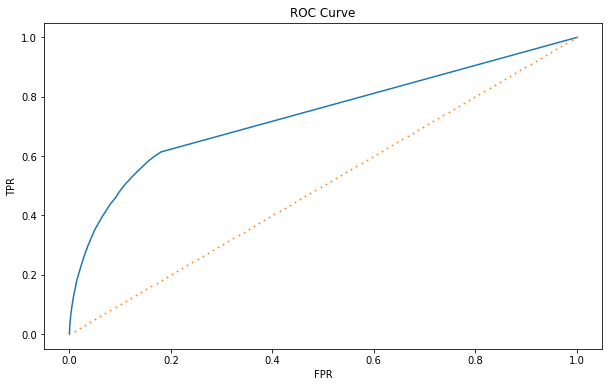

In [13]:
roc_curve_plot(fpr=fpr, tpr=tpr)

In [14]:
'''
Calculation of metrics using standard functions
'''

print('Accuracy:          {}'.format(accuracy_score(y_test,pred)))

print('Balanced accuracy: {}'.format(balanced_accuracy_score(y_test, pred)))

print('Precision:         {}'.format(precision_score(y_test, pred)))

print('Recall:            {}'.format(recall_score(y_test, pred)))

Accuracy:          0.8660187356282779
Balanced accuracy: 0.5983259814641274
Precision:         0.6477466227721649
Recall:            0.21729692676796528


<a id="7"></a> <br>

# <div align="center">7. Finding Important Features in Scikit-learn</div>
---------------------------------------------------------------------
[go to top](#top)

Here, you are finding important features or selecting features in the dataset. In scikit-learn, you can perform this task in the following steps:

1) First, you need to create a random forests model.


2) Second, use the feature importance variable to see feature importance scores.


3) Third, visualize these scores using the seaborn library.

In [16]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns.values).sort_values(ascending=False)
feature_imp

L     0.472846
UP    0.163921
UL    0.132293
UC    0.093095
OP    0.083007
P     0.039778
DP    0.008233
CP    0.004797
F     0.002030
dtype: float64

You can also visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.

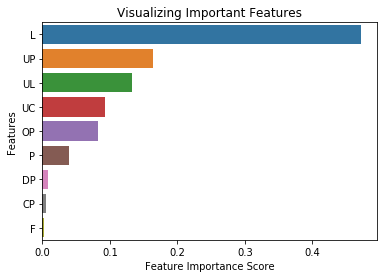

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();